In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [113]:
burn_vc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_validation_curve.csv')
enri_vc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_validation_curve.csv')
cool_vc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_validation_curve.csv')
rxtr_vc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_validation_curve.csv')

In [114]:
burn_vc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_vc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_vc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_vc.loc[:, 'Parameter'] = 'Reactor Type'

In [115]:
for vc in [rxtr_vc, burn_vc, cool_vc, enri_vc]:
    vc.loc[:, 'Hyperparameter'] = ''
    vc.iloc[0:10, -1] = 'n_neighbors'
    vc.iloc[10:20, -1] = 'max_depth'
    vc.iloc[20:30, -1] = 'max_features'
    vc.iloc[30:40, -1] = 'gamma'
    vc.iloc[40:50, -1] = 'C'

In [116]:
burn_vc.loc[burn_vc['Algorithm']=='knn', :]

,Unnamed: 0,ParamList,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter,Hyperparameter
0,0,1.0,1.0,2.336227e-13,0.989210,0.000386,knn,Burnup [MWd/MTU],n_neighbors
1,1,5.0,1.0,1.168170e-13,0.992561,0.000345,knn,Burnup [MWd/MTU],n_neighbors
2,2,9.0,1.0,1.168170e-13,0.992749,0.000391,knn,Burnup [MWd/MTU],n_neighbors
3,3,13.0,1.0,1.168170e-13,0.992730,0.000337,knn,Burnup [MWd/MTU],n_neighbors
4,4,17.0,1.0,1.168170e-13,0.992726,0.000322,knn,Burnup [MWd/MTU],n_neighbors
5,5,22.0,1.0,1.168170e-13,0.992607,0.000313,knn,Burnup [MWd/MTU],n_neighbors
6,6,26.0,1.0,1.168170e-13,0.992481,0.000290,knn,Burnup [MWd/MTU],n_neighbors
7,7,30.0,1.0,1.168170e-13,0.992388,0.000307,knn,Burnup [MWd/MTU],n_neighbors
8,8,34.0,1.0,1.168170e-13,0.992249,0.000354,knn,Burnup [MWd/MTU],n_neighbors
9,9,39.0,1.0,1.168170e-13,0.992135,0.000370,knn,Burnup [MWd/MTU],n_neighbors


# Validation Curves by Prediction Type

In [131]:
def plot_validation_curve(df, title, xname, fig, ax):
    
    params = df['ParamList']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    #ax.set_ylabel('Score', fontsize=16)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xname, fontsize=14)
    # for burnup
    #ax.set_xlim(250, 5000)
    # for everything else
    #ax.set_xlim(1000, 12100)
    ax.tick_params(labelsize=14)
    
    ax.fill_between(params, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, color = med[0], 
                    alpha=0.2)
    ax.fill_between(params, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, color = med[1], 
                    alpha=0.2)
    ax.plot(params, train_scores_mean, 'o-', color=med[0], mew=0, ms=5, 
            label="Training score")
    ax.plot(params, test_scores_mean, 'o-', color=med[1], mew=0, ms=5,
            label="Cross-validation score")
    
    return fig

In [156]:
def plot_by_prediction(df):
    #fig, alg_ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(15, 15))
    fig, alg_ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(17, 5))
    knn = ['knn', 'k-Nearest Neighbors', 'Neighbors (k)', 'n_neighbors', alg_ax[0]]
    dtree_d = ['dtree', 'Decision Trees', 'Max Depth', 'max_depth', alg_ax[1]]
    #dtree_f = ['dtree', 'Decision Trees (Max Features)', 'max_features', alg_ax[1][1]]
    #svr_g = ['svr', 'Support Vectors', 'Gamma', 'gamma', alg_ax[2]]
    svr_c = ['svr', 'Support Vectors', 'C (misclassification penalty)', 'C', alg_ax[2]]
    for alg, title, xname, hyperp, ax in [knn, dtree_d, svr_c]:
        vc = df.loc[(df['Algorithm']==alg) & (df['Hyperparameter']==hyperp)] 
        plot_validation_curve(vc, title, xname, fig, ax)
    
    # invert some axes to all follow increasing model complexity along x axis
    alg_ax[0].invert_xaxis()
    alg_ax[2].invert_xaxis()
    # set svr to log
    alg_ax[2].set_xscale("log")
    
    alg_ax[0].set_ylabel('Score', fontsize=16)
    #ax.set_ylim(0.88, 1.005)
    parameter = df.loc[0, 'Parameter']
    title = 'Validation Curves using Three Algorithms: ' + parameter + ' Prediction'
    fig.suptitle(title, fontsize=24)
    fig.subplots_adjust(top=.8)
    alg_ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.23), ncol=2)
    fig.show()
    return fig

## Reactor Type

/home/opy/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


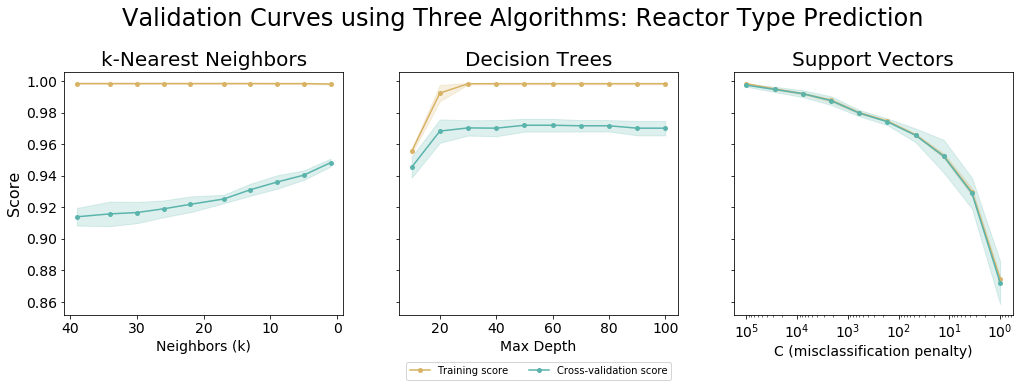

In [150]:
plt.close(fig)
fig = plot_by_prediction(rxtr_vc)
fig.savefig('../results/4oct2018/graphs/rxtr_validation.png', bbox_inches='tight', transparent=True)

## Burnup

/home/opy/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


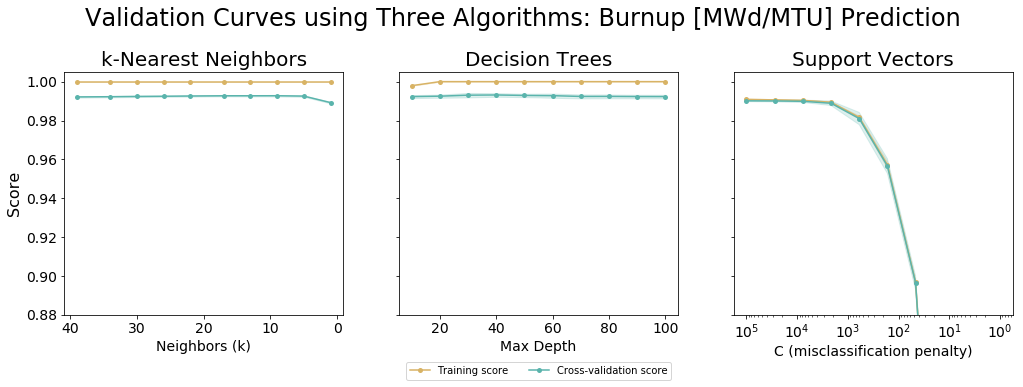

In [155]:
plt.close(fig)
fig = plot_by_prediction(burn_vc)
fig.savefig('../results/4oct2018/graphs/burn_validation.png', bbox_inches='tight', transparent=True)

## Enrichment

/home/opy/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


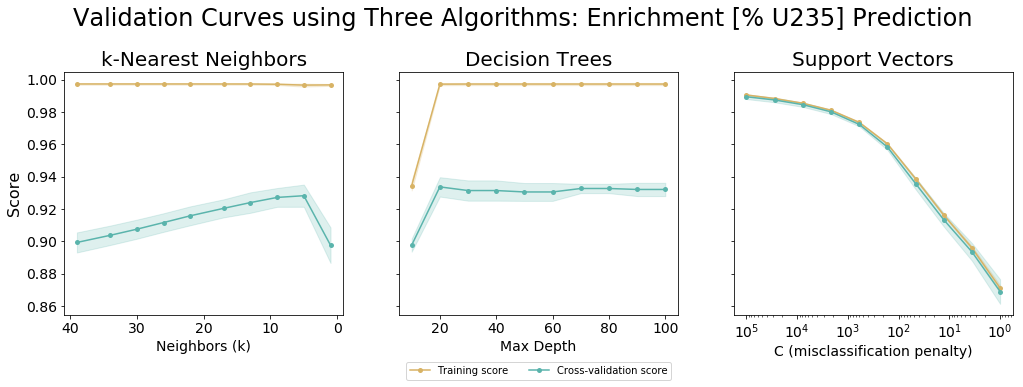

In [157]:
plt.close(fig)
fig = plot_by_prediction(enri_vc)
fig.savefig('../results/4oct2018/graphs/enri_validation.png', bbox_inches='tight', transparent=True)

## Cooling Time

/home/opy/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


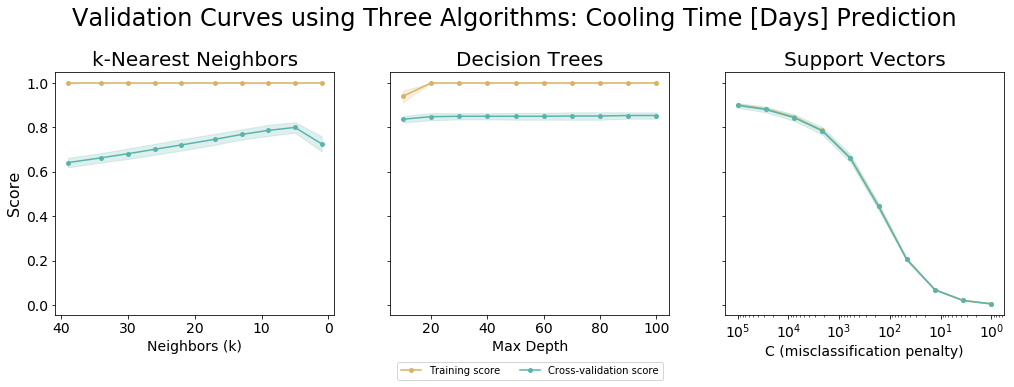

In [158]:
plt.close(fig)
fig = plot_by_prediction(cool_vc)
fig.savefig('../results/4oct2018/graphs/cool_validation.png', bbox_inches='tight', transparent=True)

# Old stuff for reference

In [6]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn')]# & (burn_vc['ScoringMetric']=='explained_variance')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn')]# & (enri_vc['ScoringMetric']=='explained_variance')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn')]# & (cool_vc['ScoringMetric']=='explained_variance')]
knn_r = rxtr_vc.loc[(rxtr_vc['Algorithm']=='knn')]# & (rxtr_vc['ScoringMetric']=='accuracy')]

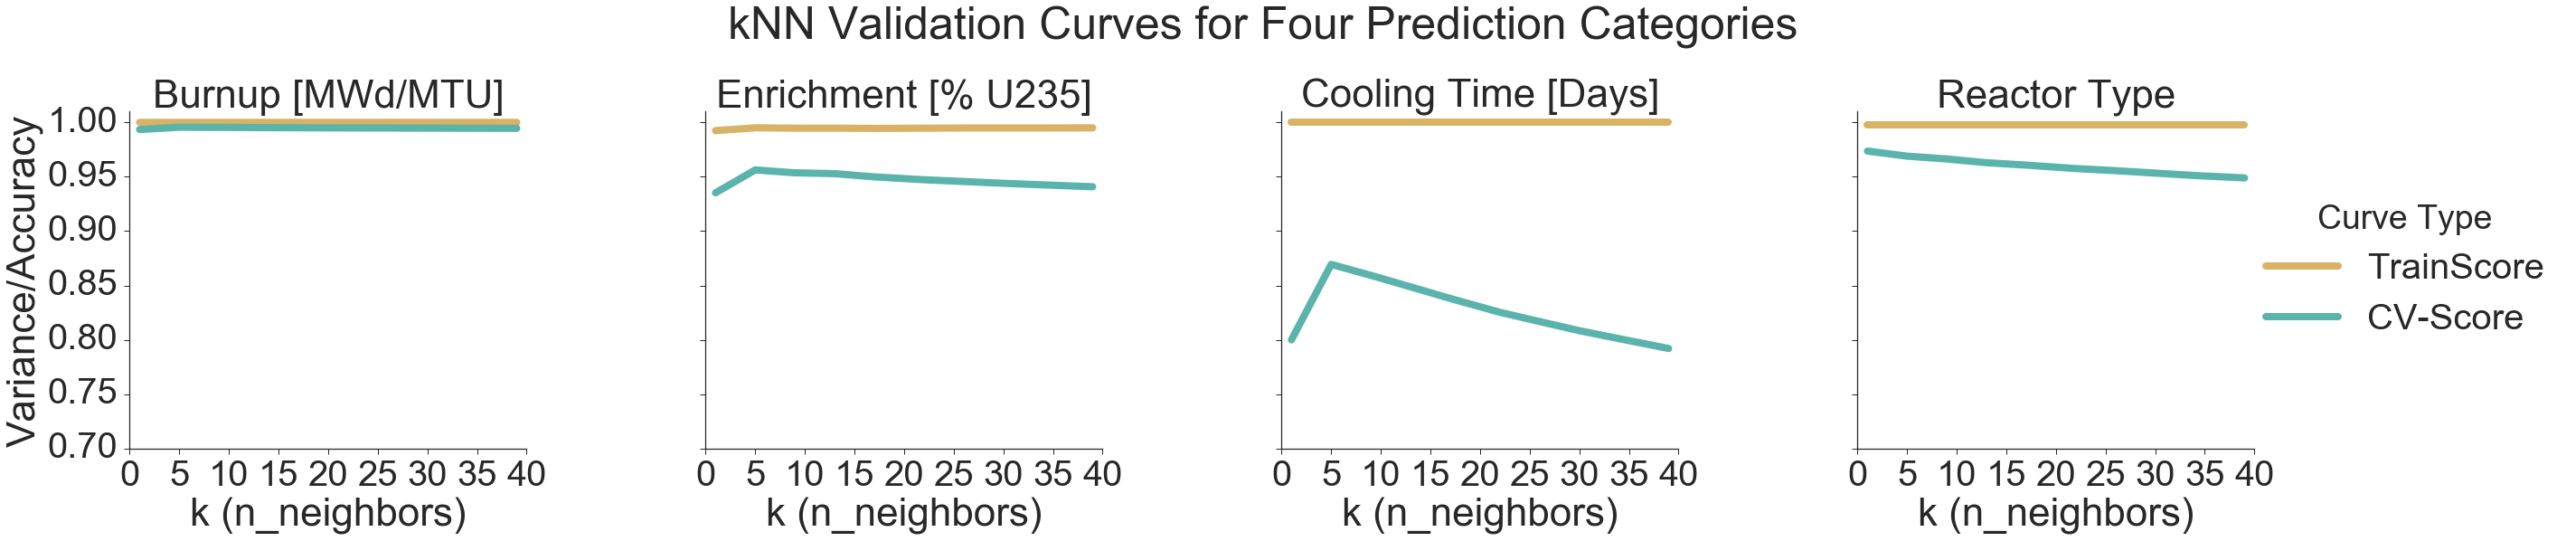

In [10]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Explained Variance/Accuracy', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'Explained Variance/Accuracy', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Variance/Accuracy')
   .set(ylim=(0.7, 1.01))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

#vc.savefig('../results/22jul2018/graphs/3knn_fissact_validation.png', bbox_inches='tight', transparent=True)

### Mean Absolute Error

In [83]:
knn_b = burn_vc.loc[(burn_vc['Algorithm']=='knn')] (burn_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_e = enri_vc.loc[(enri_vc['Algorithm']=='knn')] (enri_vc['ScoringMetric']=='neg_mean_absolute_error')]
knn_c = cool_vc.loc[(cool_vc['Algorithm']=='knn')] (cool_vc['ScoringMetric']=='neg_mean_absolute_error')]

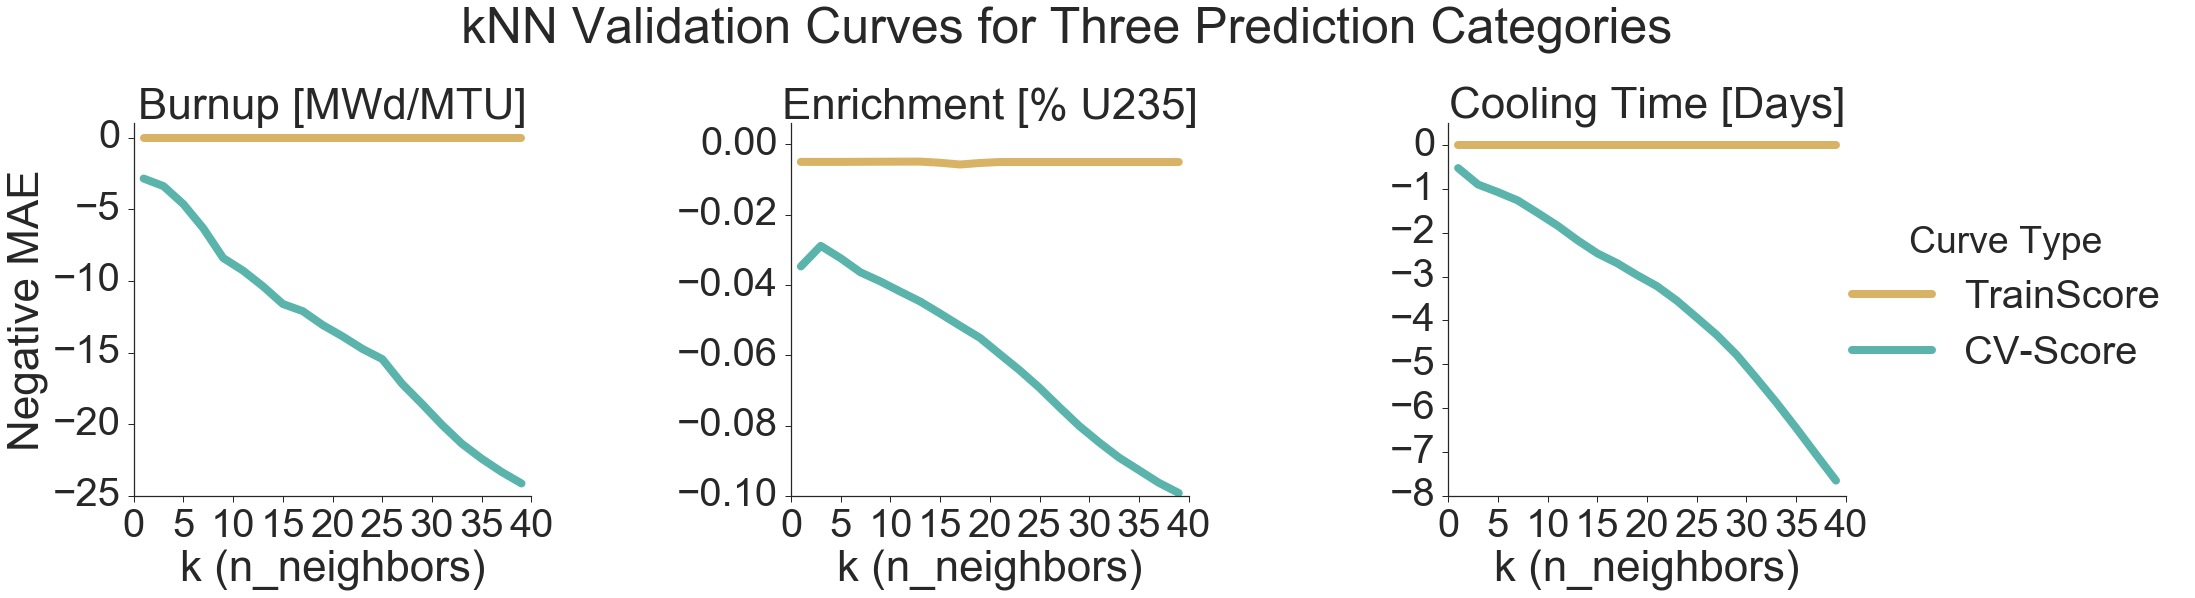

In [88]:
plt.clf()
sns.set(style="ticks", font_scale=4)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c])
df = df.melt(id_vars = ['ParamList', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='MAE', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=False, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'ParamList', 'MAE', linewidth=8)

(vc.set_axis_labels('k (n_neighbors)', 'Negative MAE')
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Validation Curves for Three Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)
#vc.axes[0,0].set_ylim(-25, 1)
#vc.axes[0,1].set_ylim(-0.1, 0.006)
#vc.axes[0,2].set_ylim(-8, 0.5)

vc.savefig('../results/22jul2018/graphs/3knn_fissact_validation_mae.png', bbox_inches='tight', transparent=True)